## Learning Curve 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score 

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target 

In [3]:

# Usando sem o parâmetro verbose 
# scoring ATENÇÃO MÉTRICAS NEGATIVAS 

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1, 50), random_state=10)

In [4]:
# Média de treino 
train_mean = np.mean(train_scores, axis=1)

In [5]:
# Desvio padrão de treino 
train_std = np.std(train_scores, axis=1)

In [6]:
# Média do teste 
test_mean = np.mean(test_scores, axis=1)

In [7]:
# Desvio padrão do teste 
test_std = np.std(test_scores, axis=1)

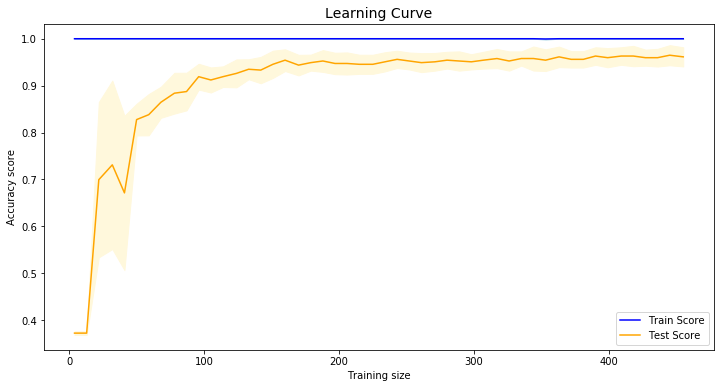

In [8]:
# Plot curva de aprendizado 

plt.figure(figsize=(12,6))

# Sobreamento 
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='lightblue')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#FFF8DC')


# Treino 
plt.plot(train_sizes, train_mean, color='blue', label='Train Score')

# Teste
plt.plot(train_sizes, test_mean, color='orange', label='Test Score')


plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.grid(False)
plt.title('Learning Curve', fontsize=14)
plt.legend(loc=4)
plt.show()